In [1]:
# Given data about weekly Walmart sales, let's try to predict whether a given record will be from during a holiday 
#We will use logistic regression, support vector machine, and decision tree classifiers to make our predictions 
# Pridict holiday or not

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


C:\Users\14437\miniconda3\envs\metrica\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\14437\AppData\Local\Temp\ipykernel_29772\545441816.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [4]:
data = pd.read_csv('walmart-sales-dataset-of-45stores.csv')

In [5]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
data.index

RangeIndex(start=0, stop=6435, step=1)

In [7]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [8]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [10]:
data.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [11]:
data['Store']

0        1
1        1
2        1
3        1
4        1
        ..
6430    45
6431    45
6432    45
6433    45
6434    45
Name: Store, Length: 6435, dtype: int64

In [12]:
filter = data['Weekly_Sales'] > 1500000
filter

0        True
1        True
2        True
3       False
4        True
        ...  
6430    False
6431    False
6432    False
6433    False
6434    False
Name: Weekly_Sales, Length: 6435, dtype: bool

In [13]:
# Feature Engineering: Year and Month
data['Year'] = data['Date'].apply(lambda x: x[-4:])
data['Month'] = data['Date'].apply(lambda x: x[3:5])

In [14]:
data['Year'].head()

0    2010
1    2010
2    2010
3    2010
4    2010
Name: Year, dtype: object

In [15]:
data['Month'].head()

0    02
1    02
2    02
3    02
4    03
Name: Month, dtype: object

In [16]:
data = data.drop('Date', axis = 1)

In [17]:
data

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,02
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,02
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,02
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,02
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,03
...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,2012,09
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,2012,10
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,2012,10
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,2012,10


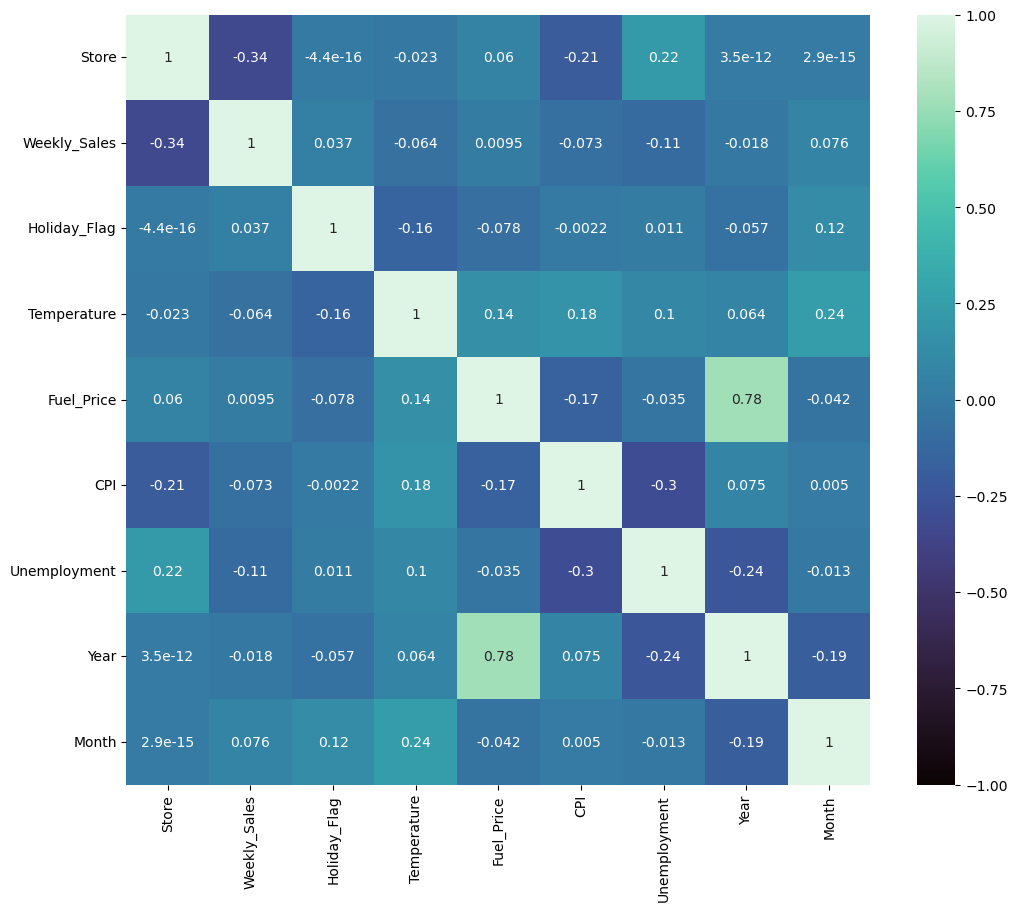

In [18]:
# Visualizing Correlations
corr = data.corr()
plt.figure(figsize = (12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap = 'mako')
plt.show()

In [19]:
#data = pd.get_dummies(data['Store'], prefix = store, dtype=int)

In [20]:
# Encoding Store Column
# def onehot_encode(df, column, prefix):
#     df = df.copy()
#     dummies = pd.get_dummies(df[column], prefix=prefix)
#     df = pd.concat([df, dummies], axis = 1)
#     df = df.drop(column, axis = 1)
#     return df
    

In [21]:
data = pd.get_dummies(data, columns=['Store'], dtype=int)

In [22]:
#data = df.drop(columns, axis = 1)

In [23]:
#data = data.drop('Store', axis = 1)

In [24]:
data

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Store_1,Store_2,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,1643690.90,0,42.31,2.572,211.096358,8.106,2010,02,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,02,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1611968.17,0,39.93,2.514,211.289143,8.106,2010,02,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1409727.59,0,46.63,2.561,211.319643,8.106,2010,02,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1554806.68,0,46.50,2.625,211.350143,8.106,2010,03,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,713173.95,0,64.88,3.997,192.013558,8.684,2012,09,0,0,...,0,0,0,0,0,0,0,0,0,1
6431,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,0,0,...,0,0,0,0,0,0,0,0,0,1
6432,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,0,0,...,0,0,0,0,0,0,0,0,0,1
6433,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#data = onehot_encode(data, column = 'Store', prefix = 'store')
# Encode the 'Store' column using the onehot_encode function
#f_encoded = onehot_encode(df, 'Store', 'store')

#print(df_encoded)

In [26]:
# Splitting/Scaling
y = data['Holiday_Flag'].copy()
X = data.drop('Holiday_Flag', axis=1).copy()

In [27]:
data

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Store_1,Store_2,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,1643690.90,0,42.31,2.572,211.096358,8.106,2010,02,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,02,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1611968.17,0,39.93,2.514,211.289143,8.106,2010,02,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1409727.59,0,46.63,2.561,211.319643,8.106,2010,02,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1554806.68,0,46.50,2.625,211.350143,8.106,2010,03,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,713173.95,0,64.88,3.997,192.013558,8.684,2012,09,0,0,...,0,0,0,0,0,0,0,0,0,1
6431,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,0,0,...,0,0,0,0,0,0,0,0,0,1
6432,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,0,0,...,0,0,0,0,0,0,0,0,0,1
6433,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,0,0,...,0,0,0,0,0,0,0,0,0,1


In [28]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [30]:
# Modeling and Training
log_model = LogisticRegression()
svm_model = SVC()
dec_model = DecisionTreeClassifier()

In [31]:
log_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
dec_model.fit(X_train, y_train)

print ("Models trained.")

Models trained.


In [ ]:
# Results

In [32]:
print("    Logistic Regression Accuracy:", log_model.score(X_test, y_test))
print("Support Vector Machine Accuracy:", svm_model.score(X_test, y_test))
print("          Decision Tree Accuracy:", dec_model.score(X_test, y_test))

    Logistic Regression Accuracy: 0.9228379078197825
Support Vector Machine Accuracy: 0.9228379078197825
          Decision Tree Accuracy: 0.9580528223718281
